## Download data  

In [ ]:
!gdown --id 1bUBWn2Osoc6Y1XskxF_o0JgWVFw0iV_6

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1bUBWn2Osoc6Y1XskxF_o0JgWVFw0iV_6
To: /content/NonLinear_data.npy
100% 5.57k/5.57k [00:00<00:00, 9.30MB/s]


In [ ]:
import math
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
tf.keras.utils.set_random_seed(1)
tf.config.experimental.enable_op_determinism()

## Load Data

In [ ]:
data_path = "/content/NonLinear_data.npy"
data = np.load(data_path, allow_pickle=True).item()
X, labels = data["X"], data["labels"]
X, labels = X.astype(np.float32), labels.astype(np.float32)

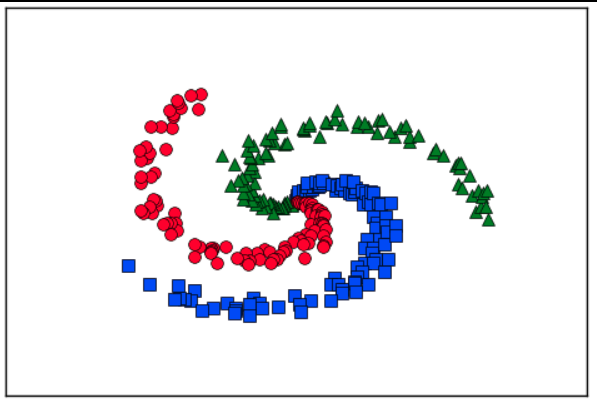

## Sử dụng Tensorflow để  build, compile và train và evaluate model. Kết quả train và evaluation được thể hiện bằng hình ảnh bằng cách sử dụng matplotlib 

### MLP - relu

In [ ]:
num_class = 3

######################### YOUR CODE HERE #########################
# Sử dụng tf.keras.Sequential để thiết kế model theo yêu cầu đề  bài 
MLP_N_model = tf.keras.Sequential([
    # Hidden layer 1: 128 nodes, input shape = 2, activation = relu

    # Output layer: 3 nodes (num_class)

])
##################################################################

MLP_N_model.summary()
#
loss = tf.keras.losses.SparseCategoricalCrossentropy()
opt = tf.keras.optimizers.SGD(learning_rate=2)
MLP_N_model.compile(optimizer=opt,loss=loss, metrics=['accuracy'])

#
MLP_N_history = MLP_N_model.fit(X, labels, batch_size=X.shape[0], epochs=500)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 128)               384       
                                                                 
 dense_4 (Dense)             (None, 3)                 387       
                                                                 
Total params: 771
Trainable params: 771
Non-trainable params: 0
_________________________________________________________________
Epoch 1/500
1/1 [==============================] - 0s 422ms/step - loss: 1.1048 - accuracy: 0.3333
Epoch 2/500
1/1 [==============================] - 0s 10ms/step - loss: 1.0041 - accuracy: 0.6200
Epoch 3/500
1/1 [==============================] - 0s 9ms/step - loss: 0.9360 - accuracy: 0.5833
Epoch 4/500
1/1 [==============================] - 0s 9ms/step - loss: 0.8767 - accuracy: 0.5667
Epoch 5/500
1/1 [==============================] - 0s 11ms/st

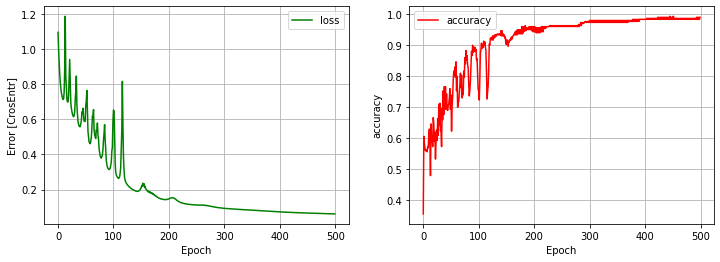

In [ ]:
fig = plt.figure(figsize=(12,4))
plt.subplot(1, 2, 1)
plt.plot(MLP_N_history.history['loss'], label='loss', color='green')
plt.xlabel('Epoch')
plt.ylabel('Error [CrosEntr]')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(MLP_N_history.history['accuracy'], label='accuracy', color='red')
plt.xlabel('Epoch')
plt.ylabel('accuracy')
plt.legend()
plt.grid(True)

In [ ]:
hist = pd.DataFrame(MLP_N_history.history)
hist['epoch'] = MLP_N_history.epoch
hist.tail()

,loss,accuracy,epoch
495,0.061484,0.990000,495
496,0.061298,0.983333,496
497,0.061266,0.990000,497
498,0.061068,0.983333,498
499,0.061013,0.990000,499


In [ ]:
print("Max train acc: ", max(hist['accuracy']))
print("Min train loss: ", min(hist['loss']))

Max train acc:  0.9933333396911621
Min train loss:  0.06101343780755997


In [ ]:
# 0.9933333396911621